In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Here I am importing the csv file which holds the hourly DA prices for the BZ ES
BZESDA2021 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\BZ_ES_20210101-20211231.csv")

# Changing any potential n/e or N/A values to NaN i.e. not having a value
BZESDA2021 = BZESDA2021.replace('n/e', np.NaN)
BZESDA2021 = BZESDA2021.replace('N/A', np.NaN)

# Arranging the results into a DataFrame with respective columns
BZESDA2021 = {'MTU (CET/CEST)': BZESDA2021.iloc[:,0],
    'DAPrice': BZESDA2021.iloc[:,1]}

# Ensuring that the data in the price column is read as numerical values
BZESDA2021['DAPrice'] = pd.to_numeric(BZESDA2021['DAPrice'], errors='coerce')

# Ensuring that the data is stored as a DataFrame and not a dictionary
BZESDA2021 = pd.DataFrame(BZESDA2021)
print(BZESDA2021.to_string())

                           MTU (CET/CEST)  DAPrice
0     01.01.2021 00:00 - 01.01.2021 01:00    50.87
1     01.01.2021 01:00 - 01.01.2021 02:00    48.19
2     01.01.2021 02:00 - 01.01.2021 03:00    44.68
3     01.01.2021 03:00 - 01.01.2021 04:00    38.50
4     01.01.2021 04:00 - 01.01.2021 05:00    36.80
5     01.01.2021 05:00 - 01.01.2021 06:00    36.55
6     01.01.2021 06:00 - 01.01.2021 07:00    36.60
7     01.01.2021 07:00 - 01.01.2021 08:00    36.55
8     01.01.2021 08:00 - 01.01.2021 09:00    36.55
9     01.01.2021 09:00 - 01.01.2021 10:00    36.55
10    01.01.2021 10:00 - 01.01.2021 11:00    37.55
11    01.01.2021 11:00 - 01.01.2021 12:00    37.55
12    01.01.2021 12:00 - 01.01.2021 13:00    37.55
13    01.01.2021 13:00 - 01.01.2021 14:00    37.55
14    01.01.2021 14:00 - 01.01.2021 15:00    36.60
15    01.01.2021 15:00 - 01.01.2021 16:00    35.50
16    01.01.2021 16:00 - 01.01.2021 17:00    36.00
17    01.01.2021 17:00 - 01.01.2021 18:00    38.50
18    01.01.2021 18:00 - 01.01.

In [17]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(BZESDA2021.iloc[:,0])):
        if i < 86:
            start = 24*i
            end = 24*(i+1)
            day = BZESDA2021.iloc[start,0]
            operation = statistics.mean(BZESDA2021.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif i == 86:
            start = 24*i
            skip = 2066
            end = 2088
            a = sum(BZESDA2021.iloc[start:skip,1])
            b = sum(BZESDA2021.iloc[skip+1:end,1])
            day = BZESDA2021.iloc[start,0]
            operation = (a+b)/(len(BZESDA2021.iloc[start:end,1])-1)
            result.append({"Day": day, "Daily DA": operation})
        elif 87 <= i < 303:
            start = 24*i
            end = 24*(i+1)
            day = BZESDA2021.iloc[start,0]
            operation = statistics.mean(BZESDA2021.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif i == 303:
            start = 24*i
            end = 7297
            day = BZESDA2021.iloc[start,0]
            operation = statistics.mean(BZESDA2021.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif 304 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = BZESDA2021.iloc[start,0]
            operation = statistics.mean(BZESDA2021.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})   
    df = pd.DataFrame(result, columns=['Day','Daily DA'])
    return df

BZESDA2021Daily = function()
BZESDA2021Daily["Daily DA"] = BZESDA2021Daily["Daily DA"].round(2)
print(BZESDA2021Daily.to_string())

                                     Day  Daily DA
0    01.01.2021 00:00 - 01.01.2021 01:00     42.51
1    02.01.2021 00:00 - 02.01.2021 01:00     48.72
2    03.01.2021 00:00 - 03.01.2021 01:00     46.93
3    04.01.2021 00:00 - 04.01.2021 01:00     59.85
4    05.01.2021 00:00 - 05.01.2021 01:00     67.55
5    06.01.2021 00:00 - 06.01.2021 01:00     70.60
6    07.01.2021 00:00 - 07.01.2021 01:00     88.93
7    08.01.2021 00:00 - 08.01.2021 01:00     94.99
8    09.01.2021 00:00 - 09.01.2021 01:00     80.66
9    10.01.2021 00:00 - 10.01.2021 01:00     66.27
10   11.01.2021 00:00 - 11.01.2021 01:00     82.45
11   12.01.2021 00:00 - 12.01.2021 01:00     84.24
12   13.01.2021 00:00 - 13.01.2021 01:00     89.94
13   14.01.2021 00:00 - 14.01.2021 01:00     87.25
14   15.01.2021 00:00 - 15.01.2021 01:00     78.42
15   16.01.2021 00:00 - 16.01.2021 01:00     67.72
16   17.01.2021 00:00 - 17.01.2021 01:00     64.51
17   18.01.2021 00:00 - 18.01.2021 01:00     82.08
18   19.01.2021 00:00 - 19.01.2

In [18]:
BZESDA2022 = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\BZ_ES_20220101-20221231.csv")

# Changing any potential n/e or N/A values to NaN i.e. not having a value
BZESDA2022 = BZESDA2022.replace('n/e', np.NaN)
BZESDA2022 = BZESDA2022.replace('N/A', np.NaN)

# Arranging the results into a DataFrame with respective columns
BZESDA2022 = {'MTU (CET/CEST)': BZESDA2022.iloc[:,0],
    'DAPrice': BZESDA2022.iloc[:,1]}

# Ensuring that the data in the price column is read as numerical values
BZESDA2022['DAPrice'] = pd.to_numeric(BZESDA2022['DAPrice'], errors='coerce')

# Ensuring that the data is stored as a DataFrame and not a dictionary
BZESDA2022 = pd.DataFrame(BZESDA2022)
print(BZESDA2022.to_string())

                           MTU (CET/CEST)  DAPrice
0     01.01.2022 00:00 - 01.01.2022 01:00   145.86
1     01.01.2022 01:00 - 01.01.2022 02:00   114.90
2     01.01.2022 02:00 - 01.01.2022 03:00   113.87
3     01.01.2022 03:00 - 01.01.2022 04:00    97.80
4     01.01.2022 04:00 - 01.01.2022 05:00    97.80
5     01.01.2022 05:00 - 01.01.2022 06:00    95.74
6     01.01.2022 06:00 - 01.01.2022 07:00    97.80
7     01.01.2022 07:00 - 01.01.2022 08:00    97.80
8     01.01.2022 08:00 - 01.01.2022 09:00    97.80
9     01.01.2022 09:00 - 01.01.2022 10:00    70.05
10    01.01.2022 10:00 - 01.01.2022 11:00    76.79
11    01.01.2022 11:00 - 01.01.2022 12:00    84.10
12    01.01.2022 12:00 - 01.01.2022 13:00    94.74
13    01.01.2022 13:00 - 01.01.2022 14:00    96.80
14    01.01.2022 14:00 - 01.01.2022 15:00    97.80
15    01.01.2022 15:00 - 01.01.2022 16:00    98.52
16    01.01.2022 16:00 - 01.01.2022 17:00   114.50
17    01.01.2022 17:00 - 01.01.2022 18:00   149.97
18    01.01.2022 18:00 - 01.01.

In [19]:
import statistics
from itertools import islice
import numpy as np

def function():
    result = []
    for i in range(0, len(BZESDA2022.iloc[:,0])):
        if i < 85:
            start = 24*i
            end = 24*(i+1)
            day = BZESDA2022.iloc[start,0]
            operation = statistics.mean(BZESDA2022.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif i == 85: # For some reason this day does not show in the DataFrame
            start = 24*i
            skip = 2042
            end = 2064
            a = sum(BZESDA2022.iloc[start:skip,1])
            b = sum(BZESDA2022.iloc[skip+1:end,1])
            day = BZESDA2022.iloc[start,0]
            operation = (a+b)/(len(BZESDA2022.iloc[start:end,1])-1)
            result.append({"Day": day, "Daily DA": operation})
        elif 86 <= i < 302:
            start = 24*i
            end = 24*(i+1)
            day = BZESDA2022.iloc[start,0]
            operation = statistics.mean(BZESDA2022.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif i == 302:
            start = 24*i
            end = 7273
            day = BZESDA2022.iloc[start,0]
            operation = statistics.mean(BZESDA2022.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})
        elif 303 <= i < 365:
            start = 24*i+1
            end = 24*(i+1)+1
            day = BZESDA2022.iloc[start,0]
            operation = statistics.mean(BZESDA2022.iloc[start:end,1])
            result.append({"Day": day, "Daily DA": operation})   
    df = pd.DataFrame(result, columns=['Day','Daily DA'])
    return df

BZESDA2022Daily = function()
BZESDA2022Daily["Daily DA"] = BZESDA2022Daily["Daily DA"].round(2)
print(BZESDA2022Daily.to_string())

                                     Day  Daily DA
0    01.01.2022 00:00 - 01.01.2022 01:00    122.63
1    02.01.2022 00:00 - 02.01.2022 01:00    136.97
2    03.01.2022 00:00 - 03.01.2022 01:00    150.50
3    04.01.2022 00:00 - 04.01.2022 01:00    152.15
4    05.01.2022 00:00 - 05.01.2022 01:00    180.20
5    06.01.2022 00:00 - 06.01.2022 01:00    212.98
6    07.01.2022 00:00 - 07.01.2022 01:00    215.86
7    08.01.2022 00:00 - 08.01.2022 01:00    203.45
8    09.01.2022 00:00 - 09.01.2022 01:00    119.24
9    10.01.2022 00:00 - 10.01.2022 01:00    217.26
10   11.01.2022 00:00 - 11.01.2022 01:00    223.16
11   12.01.2022 00:00 - 12.01.2022 01:00    206.07
12   13.01.2022 00:00 - 13.01.2022 01:00    215.10
13   14.01.2022 00:00 - 14.01.2022 01:00    202.95
14   15.01.2022 00:00 - 15.01.2022 01:00    218.82
15   16.01.2022 00:00 - 16.01.2022 01:00    213.10
16   17.01.2022 00:00 - 17.01.2022 01:00    244.67
17   18.01.2022 00:00 - 18.01.2022 01:00    222.73
18   19.01.2022 00:00 - 19.01.2

In [20]:
BZES = pd.concat([BZESDA2021Daily["Daily DA"], BZESDA2022Daily["Daily DA"]], ignore_index=True).to_frame("BZN|ES")

BZES["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "BZN|ES"]

#BZGBDAdata["Date"] = pd.date_range(start="1/1/2021", periods=365, freq="D")
BZES = BZES.reindex(columns=NewOrder)

BZES

,Date,BZN|ES
0,2021-01-01,42.51
1,2021-01-02,48.72
2,2021-01-03,46.93
3,2021-01-04,59.85
4,2021-01-05,67.55
...,...,...
725,2022-12-27,109.49
726,2022-12-28,41.41
727,2022-12-29,16.19
728,2022-12-30,6.02


<class 'pandas.core.series.Series'>


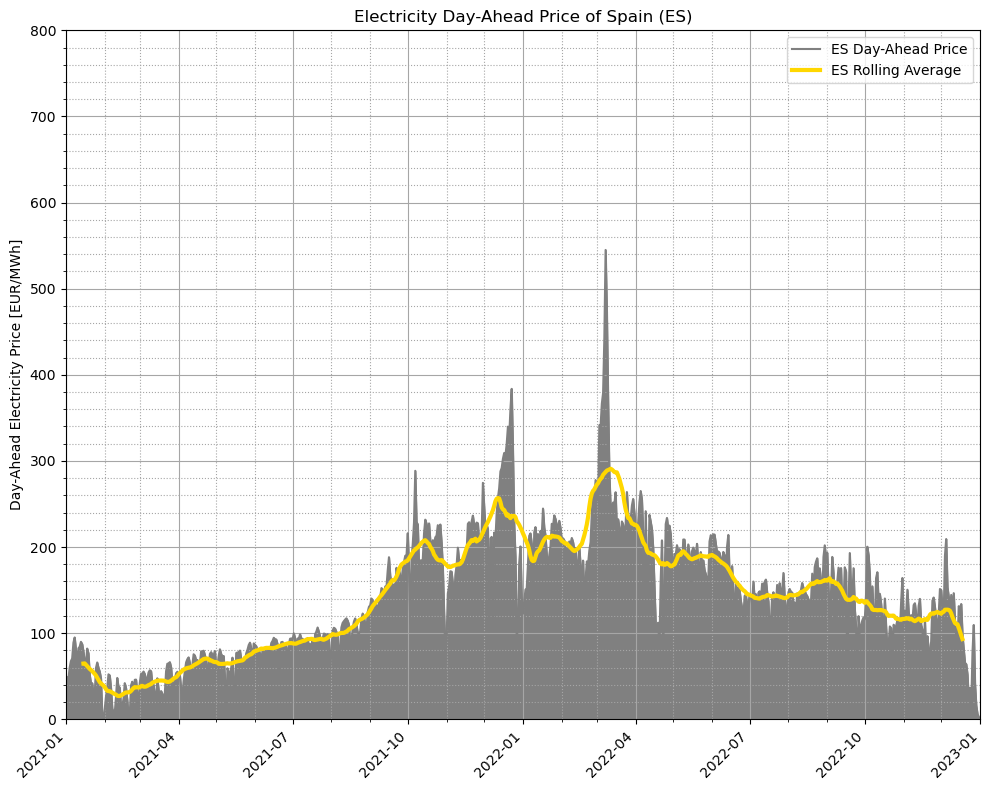

(18628.0, 19358.0)


In [21]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

print(type(BZES["BZN|ES"]))

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('Electricity Day-Ahead Price of Spain (ES)')
plt.ylabel('Day-Ahead Electricity Price [EUR/MWh]')

ax.plot(BZES["Date"], BZES["BZN|ES"], color = "grey", label="ES Day-Ahead Price")
ax.plot(BZES["Date"], BZES["BZN|ES"].rolling(28,  center=True).mean(), linewidth=3, color = "gold", label="ES Rolling Average")
plt.fill_between(BZES["Date"], BZES["BZN|ES"].astype(float), color="grey")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

#n = 30
#ax.xaxis.set_minor_locator(plt.MultipleLocator(n-3))
#ax.xaxis.set_major_locator(plt.MultipleLocator(n))
ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

#fig.autofmt_xdate()

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0, 800)
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()
print(ax.get_xlim())

In [22]:
%store BZES
del BZES

Stored 'BZES' (DataFrame)
